## NEURAL NETWORKS SCRATCH

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/ramendra/Desktop/ML-new-/Neural Networks/fashion-mnist_test.csv')
# data = pd.read_csv("./fashion-mnist_test.csv")
x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0

print (X.shape,y.shape)

(10000, 784) (10000,)


In [4]:
X_train = X[:8000,:]
X_val = X[8000:,:]

y_train = y[:8000]
y_val = y[8000:]

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)


(8000, 784) (8000,)
(2000, 784) (2000,)


In [26]:
INP = 784 
# Keep your neurons in power of 2
H1_SIZE = 256
H2_SIZE = 64
OUT = 10
BATCH_SIZE = 250
EPOCH = 40
LR = 0.003

In [27]:
def accuracy(Y_pred, Y_act):
    return (100.0*np.sum((Y_pred==Y_act)/Y_pred.shape[0]))
    

In [28]:
# Initialiing Weights random_number(between 0 & 1) multipllied by sqrt(inp.size)
def ini_weights():
    
    np.random.seed(0)
    model = {}
    model["W1"] = np.random.randn(INP,H1_SIZE)/np.sqrt(INP)
    model["B1"] = np.zeros((1,H1_SIZE))
    model["W2"] = np.random.randn(H1_SIZE,H2_SIZE)/np.sqrt(H1_SIZE)
    model["B2"] = np.zeros((1,H2_SIZE))
    model["W3"] = np.random.randn(H2_SIZE,OUT)/np.sqrt(H2_SIZE)
    model["B3"] = np.zeros((1,OUT))
    
    return model

In [29]:
def forward_prop(model,x):
    z1 = x.dot(model["W1"]) + model["B1"]
    a1 = np.tanh(z1)
    z2 = a1.dot(model["W2"]) + model["B2"]
    a2 = np.tanh(z2)
    z3 = a2.dot(model["W3"]) + model["B3"]
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    
    return a1,a2,y_out

In [30]:
def back_prop(model, x , a1, a2, y_out, y_act):
    delta4 = y_out
    delta4[range(y_act.shape[0]), y_act] -= 1
    dw3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis=0)
    delta3 = (1-np.square(a2))*delta4.dot(model["W3"].T)
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0)
    delta2 = (1-np.square(a1))*delta3.dot(model["W2"].T)
    dw1 = (x.T).dot(delta2)
    db1 = np.sum(delta2, axis=0)
    
    model["W1"] -= LR*dw1
    model["B1"] -= LR*db1
    model["W2"] -= LR*dw2
    model["B2"] -= LR*db2
    model["W3"] -= LR*dw3
    model["B3"] -= LR*db3
    
    return model

In [31]:
def loss(model, Y_pred, Y_act):
    correct_logprobs = -np.log2(Y_pred[range(Y_act.shape[0]), Y_act])
    l = np.sum(correct_logprobs)
    
    return (1.0/Y_pred.shape[0])*l

In [32]:
def predict(Y_out):
    return np.argmax(Y_out, axis=1)

In [33]:
def main():
    training_loss = []
    val_loss = []
    val_acc = []
    model = ini_weights()
    
    for e in range(EPOCH):
        print ("\n Epoch : %d" %(e+1))
        count = 0
        while (count + BATCH_SIZE) < y_train.shape[0]:
            batch_data = X_train[count:(count+BATCH_SIZE),:]
            batch_labels = y_train[count:(count+BATCH_SIZE),]
            count += BATCH_SIZE
            
            a1,a2,y_out = forward_prop(model,batch_data)
            model = back_prop(model,batch_data,a1,a2,y_out,batch_labels)
            
        _,_,p = forward_prop(model,X_train)
        training_loss.append(loss(model,p,y_train))
            
        print('training_loss : %.3f' %(loss(model,p,y_train)))
            
        _,_,p = forward_prop(model,X_val)
        pred = predict(p)
        val_loss.append(loss(model,p,y_val))
        val_acc.append(accuracy(pred,y_val))
        print('validation_loss : %.3f' %(loss(model,p,y_val)))
        print('validation_acc : %.3f' %(accuracy(pred,y_val)))
    print ("##############COMPLETED############")
    
    return training_loss,val_loss,val_acc

In [38]:
training_loss, val_loss, val_acc = main()


 Epoch : 1
training_loss : 3.280
validation_loss : 3.181
validation_acc : 46.400

 Epoch : 2
training_loss : 1.877
validation_loss : 1.793
validation_acc : 63.550

 Epoch : 3
training_loss : 1.439
validation_loss : 1.396
validation_acc : 68.500

 Epoch : 4
training_loss : 0.883
validation_loss : 0.876
validation_acc : 76.500

 Epoch : 5
training_loss : 0.850
validation_loss : 0.871
validation_acc : 76.050

 Epoch : 6
training_loss : 0.776
validation_loss : 0.812
validation_acc : 77.250

 Epoch : 7
training_loss : 0.755
validation_loss : 0.807
validation_acc : 78.400

 Epoch : 8
training_loss : 0.732
validation_loss : 0.804
validation_acc : 79.050

 Epoch : 9
training_loss : 0.788
validation_loss : 0.823
validation_acc : 79.650

 Epoch : 10
training_loss : 0.683
validation_loss : 0.757
validation_acc : 80.150

 Epoch : 11
training_loss : 0.688
validation_loss : 0.772
validation_acc : 80.350

 Epoch : 12
training_loss : 0.631
validation_loss : 0.723
validation_acc : 82.550

 Epoch : 13


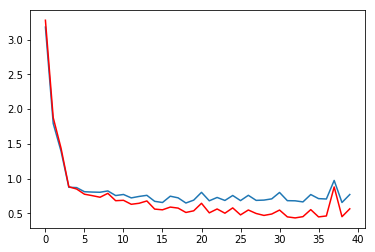

In [39]:
plt.figure(0)
plt.plot(val_loss)
plt.plot(training_loss,color='red')
plt.show()

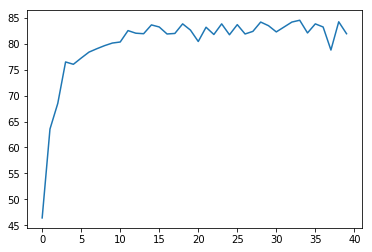

In [40]:
plt.figure(0)
plt.plot(val_acc)
plt.show()